# Regressão 01 - tarefa 03 - transformações em X e Y

In [98]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [ ]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [ ]:
# Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, diner e net_bill.
y, X = patsy.dmatrices('tip ~ sex + smoker + day + net_bill', data=tips, return_type='dataframe')

modelo = sm.OLS(y, X).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     20.14
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           5.30e-19
Time:                        22:44:16   Log-Likelihood:                -374.68
No. Observations:                 244   AIC:                             763.4
Df Residuals:                     237   BIC:                             787.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2017      0.258      4.652

In [ ]:
# Remova as variáveis não significantes

y, X = patsy.dmatrices('tip ~ smoker + net_bill', data=tips, return_type='dataframe')

modelo = sm.OLS(y, X).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           4.56e-22
Time:                        22:44:16   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172   

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

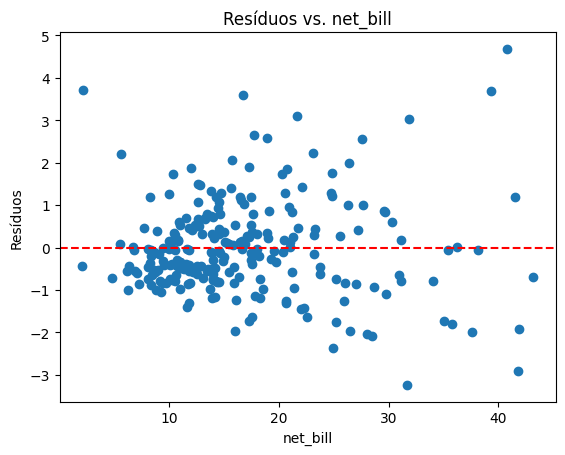

In [ ]:
# observe o gráfico de resíduos em função de net_bill

residuos = modelo.resid
plt.scatter(tips['net_bill'], residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. net_bill')
plt.show()


In [ ]:
# teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

tips['log_net_bill'] = np.log(tips['net_bill'])
y, X = patsy.dmatrices('tip ~ smoker + log_net_bill', data=tips, return_type='dataframe')

modelo_log = sm.OLS(y, X).fit()
print(modelo_log.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           5.38e-19
Time:                        22:44:17   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.2890      0.445     -2.896   

In [ ]:
tips['net_bill2'] = tips['net_bill']**2
y, X = patsy.dmatrices('tip ~ smoker + net_bill + net_bill2', data=tips, return_type='dataframe')

modelo_poly = sm.OLS(y, X).fit()
print(modelo_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     40.55
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           3.11e-21
Time:                        22:44:17   Log-Likelihood:                -374.93
No. Observations:                 244   AIC:                             757.9
Df Residuals:                     240   BIC:                             771.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0129      0.361      2.804   

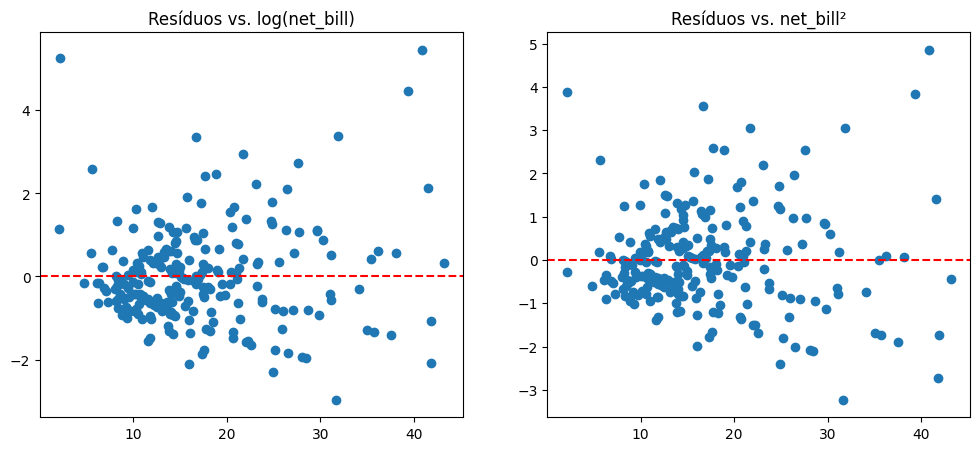

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(tips['net_bill'], modelo_log.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs. log(net_bill)')

plt.subplot(1,2,2)
plt.scatter(tips['net_bill'], modelo_poly.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs. net_bill²')

plt.show()


## O modelo net_bill2 obteve um R-squared:0.336, melhor do que o net-bill que obteve um R-squared: 0.295

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [60]:
# 1.Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa
# Carregar dataframe
renda = pd.read_csv('/content/previsao_de_renda.csv')
df = pd.DataFrame(renda)
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [61]:
# Ajustes no DF

# Remover colunas desnecessárias
df = renda.drop(columns=['Unnamed: 0','data_ref', 'id_cliente'])

# Buscar por valores NaN
df.isna().sum()

# Remover valores NaN
df.dropna(inplace=True)

In [62]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [99]:
# Codificar variáveis categóricas
df_dummies= pd.get_dummies(df, drop_first=True)
df_dummies.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,False,True,0,26,6.602740,1.0,8060.34,False,False,True,...,False,False,True,False,False,True,False,False,False,False
1,True,True,0,28,7.183562,2.0,1852.15,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,True,True,0,35,0.838356,2.0,2253.89,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,False,True,1,30,4.846575,3.0,6600.77,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,True,False,0,33,4.293151,1.0,6475.97,True,False,False,...,False,False,True,False,False,False,False,False,False,True


In [100]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12427 non-null  bool   
 1   posse_de_imovel                12427 non-null  bool   
 2   qtd_filhos                     12427 non-null  int64  
 3   idade                          12427 non-null  int64  
 4   tempo_emprego                  12427 non-null  float64
 5   qt_pessoas_residencia          12427 non-null  float64
 6   renda                          12427 non-null  float64
 7   sexo_M                         12427 non-null  bool   
 8   tipo_renda_Bolsista            12427 non-null  bool   
 9   tipo_renda_Empresário          12427 non-null  bool   
 10  tipo_renda_Pensionista         12427 non-null  bool   
 11  tipo_renda_Servidor público    12427 non-null  bool   
 12  educacao_Pós graduação         12427 non-null  bool

In [67]:
from statsmodels.formula.api import ols

#modelo = preço vs conveniência
mdl_renda = ols('renda ~ tempo_emprego ', data=df_dummies).fit()
print(mdl_renda.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:27:26   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

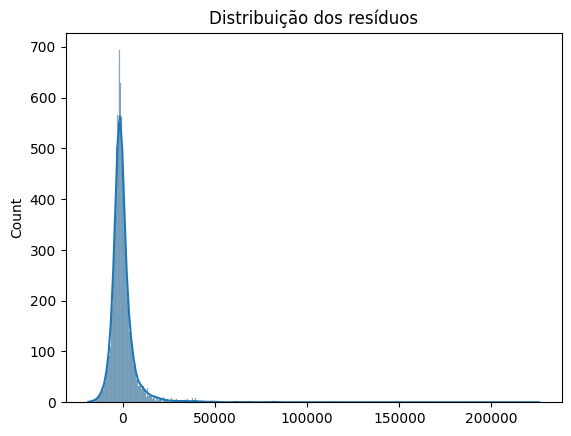

In [71]:
# 2.Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

# Histograma dos resíduos
sns.histplot(residuos, kde=True)
plt.title('Distribuição dos resíduos')
plt.show()


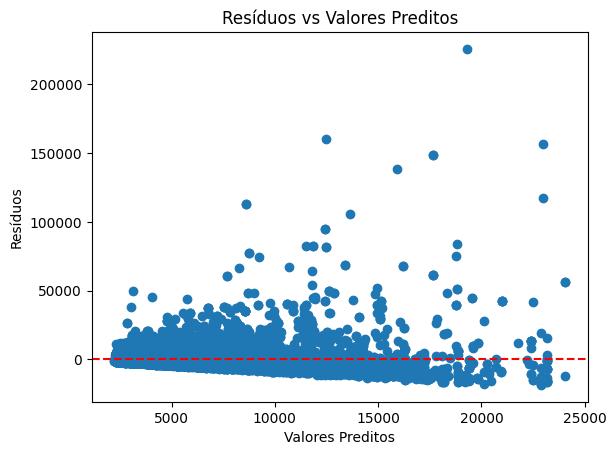

In [72]:
# Gráfico de dispersão resíduos vs valores preditos
plt.scatter(valores_preditos, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()


In [101]:
mdl_renda_multipla = ols('renda ~ tempo_emprego + idade + qtd_filhos + sexo_M', data=df_dummies).fit()
print(mdl_renda_multipla.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1046.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:04:24   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12422   BIC:                         2.577e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2177.2940    347.095     -6.

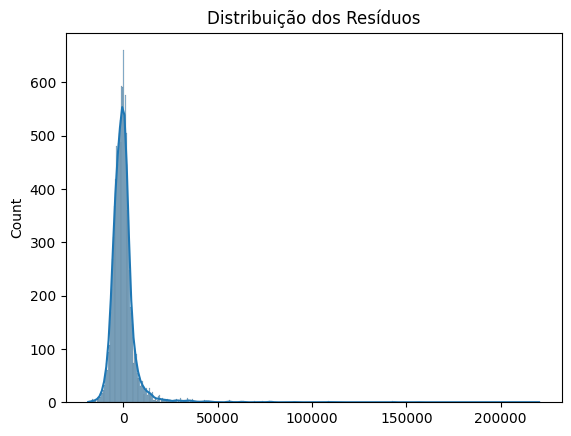

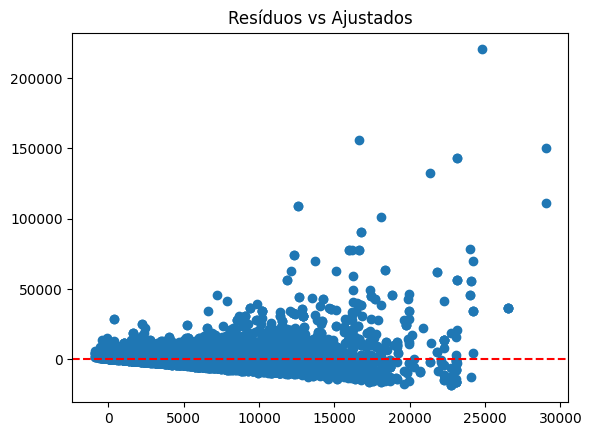

In [102]:
# 3.Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.

# Plotando resíduos
residuos = mdl_renda_multipla.resid
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos")
plt.show()

# Plotando resíduos vs ajustados
plt.scatter(mdl_renda_multipla.fittedvalues, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Resíduos vs Ajustados")
plt.show()


In [103]:
# adicionando np.log em renda
mdl_renda_transformado = ols('np.log(renda) ~ tempo_emprego + idade + qtd_filhos + sexo_M', data=df_dummies).fit()
print(mdl_renda_transformado.summary())


                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1625.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:05:52   Log-Likelihood:                -13701.
No. Observations:               12427   AIC:                         2.741e+04
Df Residuals:                   12422   BIC:                         2.745e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.2825      0.033    221.

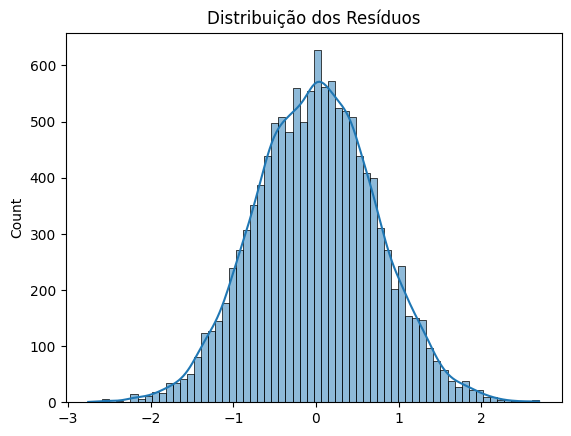

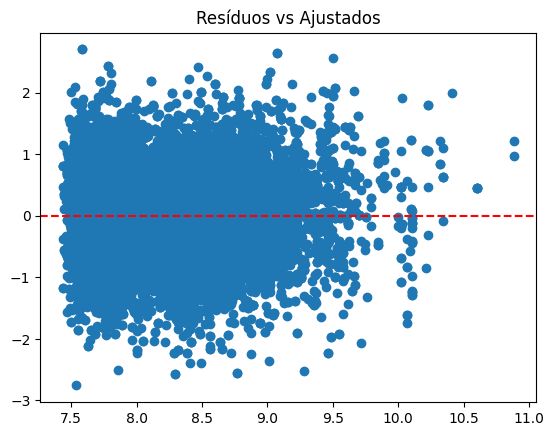

In [104]:
# Plotando resíduos
residuos = mdl_renda_transformado.resid
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos")
plt.show()

# Plotando resíduos vs ajustados
plt.scatter(mdl_renda_transformado.fittedvalues, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Resíduos vs Ajustados")
plt.show()


In [93]:
# explorando mais variáveis
mdl_renda_transformado_2 = ols('np.log(renda) ~ tempo_emprego + idade + qtd_filhos + sexo_M + tipo_renda_Empresário + estado_civil_União + educacao_Secundário', data=df_dummies).fit()
print(mdl_renda_transformado2.summary())


                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     965.9
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:15:07   Log-Likelihood:                -13615.
No. Observations:               12427   AIC:                         2.725e+04
Df Residuals:                   12419   BIC:                         2.731e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [105]:
# Renomeando as colunas para substituir os espaços por underscores
df_dummies.columns = df_dummies.columns.str.replace(' ', '_')

# Explorando variáveis de educação
mdl_renda_transformado_3 = ols('np.log(renda) ~ tempo_emprego + idade + qtd_filhos + sexo_M + tipo_renda_Empresário + estado_civil_União + educacao_Pós_graduação + educacao_Secundário + educacao_Superior_completo + educacao_Superior_incompleto', data=df_dummies).fit()
print(mdl_renda_transformado_3.summary())


                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     679.5
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:07:28   Log-Likelihood:                -13604.
No. Observations:               12427   AIC:                         2.723e+04
Df Residuals:                   12416   BIC:                         2.731e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [96]:
# 4.Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
# Ajustando o modelo removendo as variáveis não significativas
mdl_renda_final_reduzido = ols('np.log(renda) ~ tempo_emprego + idade + qtd_filhos + sexo_M + tipo_renda_Empresário + estado_civil_União', data=df_dummies).fit()

# Exibindo os resultados do modelo reduzido
print(mdl_renda_final_reduzido.summary())


                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     1113.
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:19:58   Log-Likelihood:                -13643.
No. Observations:               12427   AIC:                         2.730e+04
Df Residuals:                   12420   BIC:                         2.735e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

# Interpretação dos Parâmetros:

As variáveis sexo_M, tipo_renda_Empresário, tempo_emprego, idade e qtd_filhos são estatisticamente significativas (p-valor < 0.05), o que significa que têm uma relação importante com a renda.

O valor do intercepto (ou constante) é 7.2199. Isso significa que, quando todas as variáveis independentes têm valor 0 (ou o valor base para as variáveis categóricas), o valor esperado de np.log(renda) (a transformação logarítmica da renda) será 7.2199.

Interpretação: Em termos de renda (não logarítmica), a renda esperada seria e^7.2199 ≈ 1343.68 (com base na transformação logarítmica). Por exemplo:

* sexo_M[T.True] = 0.7907

* O coeficiente de 0.7907 significa que, mantendo todas as outras variáveis constantes, se a pessoa for do sexo masculino, espera-se que a transformação logarítmica da renda aumente em 0.7907, ou seja, a renda esperada será aproximadamente e^0.7907 ≈ 2.21 vezes maior em relação ao sexo feminino.


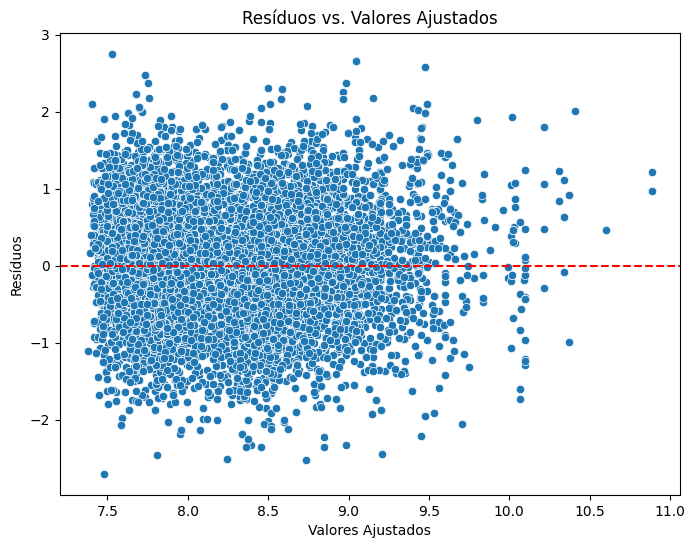

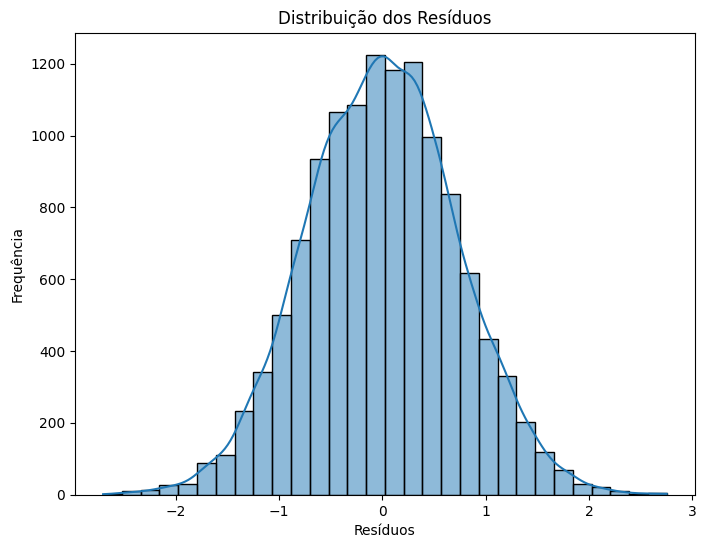

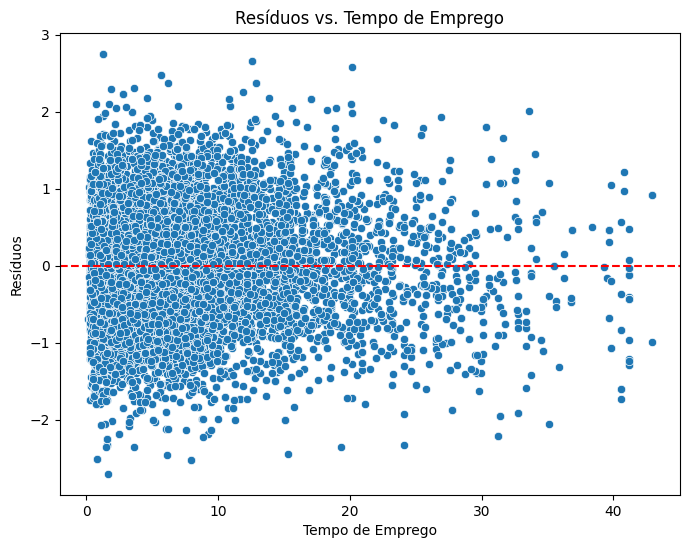

In [97]:
# 5.Faça uma análise de resíduos. Avalie a qualidade do ajuste.

# Resíduos do modelo ajustado
residuos = mdl_renda_final_reduzido.resid
valores_ajustados = mdl_renda_final_reduzido.fittedvalues

# 1. Gráfico de Resíduos vs. Valores Ajustados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=valores_ajustados, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()

# 2. Gráfico de Histograma dos Resíduos
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, bins=30)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# 3. Gráfico de Resíduos vs. Tempo de Emprego (como exemplo de variável independente)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_dummies['tempo_emprego'], y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs. Tempo de Emprego')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.show()


* Os resíduos seguem uma distribuição aproximadamente normal, com um formato simétrico e centrado em zero.

* A transformação logarítmica corrigiu a assimetria observada no modelo anterior, melhorando a adequação aos pressupostos da regressão linear.